In [1]:
using Arpack
using LinearAlgebra
using CairoMakie
using LaTeXStrings
using Revise
using Interpolations
using Roots
using ColorSchemes
using Colors
using QuadGK
using Integrals
using StaticArrays
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Spinors/rmg_K.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Lattice_setup/lattice_BZ.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/3P_funcs/patch_methods.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/3P_funcs/rmg_3pV.jl")

rmg_alpha_exp (generic function with 1 method)

In [2]:
function wrap_angle(ang)
    return mod(ang + pi, 2pi) - pi
end

wrap_angle (generic function with 1 method)

In [3]:
function rmg_parent_term(nu, kappa)
    return -2 * (nu^2 + 4 * kappa^2 * nu^4 + kappa^4 * nu^6) / (1 + kappa^2 * nu^2 + kappa^4 * nu^4)^2
end

rmg_parent_term (generic function with 1 method)

In [4]:
function A1_comp(delta, alpha, k, index, vF)
    x, y = k
    epsilon = vF_analytic_eigenvalues(alpha, delta, k[1], k[2], vF)[index]
    # convenience
    v = vF
    omega = exp(im * 2 * pi/ 3)
    q = k[1] + im * k[2]
    # variables
    f1 = delta + alpha * (q + conj(q))
    v1 = v * (q + conj(q))
    f3 = delta + alpha * (omega * q + conj(omega * q))
    v3 = v * (omega * q + conj(omega * q))
    f5 = delta + alpha * (conj(omega) * q + omega * conj(q))
    v5 = v * (conj(omega) * q + omega * conj(q))
    # normalization
    nmz = (((epsilon - v5) * (epsilon - v3) - abs2(f1))^2 + abs2(f1) * (abs2(f3) + abs2(f5)) + 
    2 * real(f1 * f3 * f5) * (2 * epsilon - v3 - v5) + abs2(f3) * (epsilon - v3)^2 + abs2(f5) * (epsilon - v5)^2)
    # eigenvector entries
    A1 = (epsilon - v5) * (epsilon - v3) - abs2(f1)
    
    return A1 / sqrt(nmz)
end

A1_comp (generic function with 1 method)

In [5]:
function A3_comp(delta, alpha, k, index, vF)
    x, y = k
    epsilon = vF_analytic_eigenvalues(alpha, delta, k[1], k[2], vF)[index]
    # convenience
    v = vF
    omega = exp(im * 2 * pi/ 3)
    q = k[1] + im * k[2]
    # variables
    f1 = delta + alpha * (q + conj(q))
    v1 = v * (q + conj(q))
    f3 = delta + alpha * (omega * q + conj(omega * q))
    v3 = v * (omega * q + conj(omega * q))
    f5 = delta + alpha * (conj(omega) * q + omega * conj(q))
    v5 = v * (conj(omega) * q + omega * conj(q))
    # normalization
    nmz = (((epsilon - v5) * (epsilon - v3) - abs2(f1))^2 + abs2(f1) * (abs2(f3) + abs2(f5)) + 
    2 * real(f1 * f3 * f5) * (2 * epsilon - v3 - v5) + abs2(f3) * (epsilon - v3)^2 + abs2(f5) * (epsilon - v5)^2)
    # eigenvector entries
    A3 = conj(f3) * (epsilon - v3) + f1 * f5
    
    return A3 / sqrt(nmz)
end

A3_comp (generic function with 1 method)

In [6]:
function A5_comp(delta, alpha, k, index, vF)
    x, y = k
    epsilon = vF_analytic_eigenvalues(alpha, delta, k[1], k[2], vF)[index]
    # convenience
    v = vF
    omega = exp(im * 2 * pi/ 3)
    q = k[1] + im * k[2]
    # variables
    f1 = delta + alpha * (q + conj(q))
    v1 = v * (q + conj(q))
    f3 = delta + alpha * (omega * q + conj(omega * q))
    v3 = v * (omega * q + conj(omega * q))
    f5 = delta + alpha * (conj(omega) * q + omega * conj(q))
    v5 = v * (conj(omega) * q + omega * conj(q))
    # normalization
    nmz = (((epsilon - v5) * (epsilon - v3) - abs2(f1))^2 + abs2(f1) * (abs2(f3) + abs2(f5)) + 
    2 * real(f1 * f3 * f5) * (2 * epsilon - v3 - v5) + abs2(f3) * (epsilon - v3)^2 + abs2(f5) * (epsilon - v5)^2)
    # eigenvector entries
    A5 = f5 * (epsilon - v5) + conj(f1) * conj(f3)
    
    return A5 / sqrt(nmz)
end

A5_comp (generic function with 1 method)

In [7]:
function d_A1(delta, alpha, k, index, vF, dmu)
    A1_0 = A1_comp(delta, alpha, k, index, vF)
    A1_x = A1_comp(delta, alpha, k .+ [dmu, 0], index, vF)
    A1_y = A1_comp(delta, alpha, k .+ [0, dmu], index, vF)
    dx_A1 = (A1_x - A1_0)/dmu
    dy_A1 = (A1_y - A1_0)/dmu

    return [dx_A1, dy_A1]
end

d_A1 (generic function with 1 method)

In [8]:
function d_A3(delta, alpha, k, index, vF, dmu)
    A3_0 = A3_comp(delta, alpha, k, index, vF)
    A3_x = A3_comp(delta, alpha, k .+ [dmu, 0], index, vF)
    A3_y = A3_comp(delta, alpha, k .+ [0, dmu], index, vF)
    dx_A3 = (A3_x - A3_0)/dmu
    dy_A3 = (A3_y - A3_0)/dmu

    return [dx_A3, dy_A3]
end

d_A3 (generic function with 1 method)

In [9]:
function d_A5(delta, alpha, k, index, vF, dmu)
    A5_0 = A5_comp(delta, alpha, k, index, vF)
    A5_x = A5_comp(delta, alpha, k .+ [dmu, 0], index, vF)
    A5_y = A5_comp(delta, alpha, k .+ [0, dmu], index, vF)
    dx_A5 = (A5_x - A5_0)/dmu
    dy_A5 = (A5_y - A5_0)/dmu

    return [dx_A5, dy_A5]
end

d_A5 (generic function with 1 method)

In [10]:
function d_rmg_spinor(nu, k, dmu)
    chi_0 = rmg_spinor(3, nu, k)
    chi_x = rmg_spinor(3, nu, k .+ [dmu, 0])
    chi_y = rmg_spinor(3, nu, k .+ [0, dmu])
    dx_chi = (chi_x - chi_0)/dmu
    dy_chi = (chi_y - chi_0)/dmu
    return [dx_chi, dy_chi]
end

d_rmg_spinor (generic function with 1 method)

In [11]:
function rmg_bc(nu, q)
    qx = q[1]
    qy = q[2]
    return -(2 * nu^2 + 8 * nu^4 * (qx^2 + qy^2) + 2 * nu^6 * (qx^2 + qy^2)^2) / (1 + nu^2 * (qx^2 + qy^2) + nu^4 * (qx^2 + qy^2)^2)^2
end

rmg_bc (generic function with 1 method)

# Uniform potential scalings

In [85]:
function rmg_parent_term_uniform(nu, kappa, vF, q)
    kappa1 = kappa * [cos(0), sin(0)]
    kappa3 = kappa * [cos(2*pi/3), sin(2*pi/3)]
    kappa5 = kappa * [cos(4*pi/3), sin(4*pi/3)]
    delta = rmg_delta_all(kappa, nu, 3)
    alpha = rmg_alpha_all(kappa, nu, 3)

    bc1 = rmg_bc(nu, kappa1 .+ q)
    bc3 = rmg_bc(nu, kappa3 .+ q)
    bc5 = rmg_bc(nu, kappa5 .+ q)

    ham = H_mft_v2(q, delta, alpha) + H_k_v2(q, vF)

    vec = normalize(gauge_fix(eigvecs(Hermitian(ham))[:, 1]))

    return (abs2(vec[1]) * bc1 + abs2(vec[2]) * bc3 + abs2(vec[3]) * bc5)
end

rmg_parent_term_uniform (generic function with 1 method)

In [86]:
function pure_3_patch_uniform(nu, kappa, vF, q)
    delta = rmg_delta_all(kappa, nu, 3)
    alpha = rmg_alpha_all(kappa, nu, 3)
    return bc_no_spinors(reshape(q, (1, 2)), 10^(-3), vF, delta, alpha)[1]
end

pure_3_patch_uniform (generic function with 1 method)

In [87]:
function explicit_og_bc_vF(delta, alpha, index, vF)
    omega = exp(im * 2 * pi/ 3)
    k = index - 1
    v = vF
    
    nmz = 16 * real(omega^k * delta)^4 + 3 * abs(delta)^4 + 8 * real(delta^3) * real(omega^k * delta)
    
    return ((8 * sqrt(3) / nmz^2) * (8 * v * real(omega^k * delta)^3 - 12 * real(alpha * conj(delta)) * real(omega^k * delta)^2 + 
    3 * abs2(delta) * real(alpha * conj(delta)) + v * real(delta^3)) * (4 * real(omega^k * delta)^2 * imag(alpha * conj(delta)) + 
    4 * real(omega^k * delta) * imag(alpha * delta^2) - v * imag(delta^3) + abs2(delta) * imag(alpha * conj(delta))))
    
end

explicit_og_bc_vF (generic function with 1 method)

In [88]:
# function pure_3_patch_uniform(nu, kappa, vF)
#     delta = rmg_delta_all(kappa, nu, 3)
#     alpha = rmg_alpha_all(kappa, nu, 3)
#     phi = wrap_angle(angle(delta))
#     if 0 < phi && phi < 2*pi/3
#         index = 1 + 1
#     elseif 2*pi/3 < phi || phi < -2*pi/3
#         index = 0 + 1
#     elseif phi > -2*pi/3 && phi < 0
#         index = 2 + 1
#     end
#     return explicit_og_bc_vF(delta, alpha/2, index, vF/2)
# end

In [90]:
function cross_term_uniform(nu, kappa, vF, q)
    kappa1 = [kappa, 0]
    kappa3 = kappa * [cos(2*pi/3), sin(2*pi/3)]
    kappa5 = kappa * [cos(4*pi/3), sin(4*pi/3)]

    delta = rmg_delta_all(kappa, nu, 3)
    alpha = rmg_alpha_all(kappa, nu, 3)

    phi = wrap_angle(angle(delta))

    if 0 < phi && phi < 2*pi/3
        index = 1 + 1
    elseif 2*pi/3 < phi || phi < -2*pi/3
        index = 0 + 1
    elseif phi > -2*pi/3 && phi < 0
        index = 2 + 1
    end

    dmu = 10^(-7)

    ham = H_mft_v2(q, delta, alpha) + H_k_v2(q, vF)

    vec = normalize(gauge_fix(eigvecs(Hermitian(ham))[:, 1]))

    A1 = vec[1]
    grad_A1 = d_A1(delta, alpha/2, q, index, vF/2, dmu)

    A1_x = 2im * real(conj(A1) * grad_A1[1])
    A1_y = 2im * real(conj(A1) * grad_A1[2])

    A3 = vec[2]
    grad_A3 = d_A3(delta, alpha/2, q, index, vF/2, dmu)
    A3_x = 2im * real(conj(A3) * grad_A3[1])
    A3_y = 2im * real(conj(A3) * grad_A3[2])

    A5 = vec[3]
    grad_A5 = d_A5(delta, alpha/2, q, index, vF/2, dmu)
    A5_x = 2im * real(conj(A5) * grad_A5[1])
    A5_y = 2im * real(conj(A5) * grad_A5[2])

    chi1 = rmg_spinor(3, nu, kappa1 .+ q)
    grad_chi1 = d_rmg_spinor(nu, kappa1 .+ q, dmu)
    chi1_x = dot(chi1, grad_chi1[1])
    chi1_y = dot(chi1, grad_chi1[2])

    chi3 = rmg_spinor(3, nu, kappa3 .+ q)
    grad_chi3 = d_rmg_spinor(nu, kappa3 .+ q, dmu)
    chi3_x = dot(chi3, grad_chi3[1])
    chi3_y = dot(chi3, grad_chi3[2])

    chi5 = rmg_spinor(3, nu, kappa5 .+ q)
    grad_chi5 = d_rmg_spinor(nu, kappa5 .+ q, dmu)
    chi5_x = dot(chi5, grad_chi5[1])
    chi5_y = dot(chi5, grad_chi5[2])

    return real((A1_x * chi1_y - A1_y * chi1_x) + (A3_x * chi3_y - A3_y * chi3_x) + (A5_x * chi5_y - A5_y * chi5_x))
end


cross_term_uniform (generic function with 1 method)

In [91]:
function plot_uniform_scaling(kappa, vF, q)
    nu_list = range(10^(-3), 0.99, 10^3)

    curvatures = Array{Float64}(undef, 4, length(nu_list))

    for j in 1:length(nu_list)
        nu = nu_list[j]
        curvatures[1, j] = log10(abs(rmg_parent_term_uniform(nu, kappa, vF, q)))
        curvatures[2, j] = log10(abs(cross_term_uniform(nu, kappa, vF, q)))
        curvatures[3, j] = log10(abs(pure_3_patch_uniform(nu, kappa, vF, q)))
    end

    fig = Figure(size=(1800, 1000), fontsize=50, fonts = (; regular = "italic", weird = "bold"))
    ax1 = Axis(fig[1, 1], 
    title = L"\text{log_{10}} \left|\Omega(0, 0) \right| \text{ vs } \nu \ | v_F = 1", 
    ylabel = L"\text{log_{10}} \left|\Omega(0, 0) \right|", xlabel = L"\nu")


    lines!(ax1, nu_list, curvatures[3, :], label = L"\tilde{\Omega}", color = :black; linestyle = (:solid, :dense), linewidth = 7)
    lines!(ax1, nu_list, curvatures[2, :], label = L"\Omega^\times", color = :red; linestyle = (:dash, :dense), linewidth = 7)
    lines!(ax1, nu_list, curvatures[1, :], label = L"\Omega_\text{par}", color = :blue; linestyle = (:dot, :dense), linewidth = 7)
    
    
    leg = Legend(fig, ax1, patchsize = (50, 10), framevisible = true)
    fig[1, 2] = leg
    fig
end

plot_uniform_scaling (generic function with 1 method)

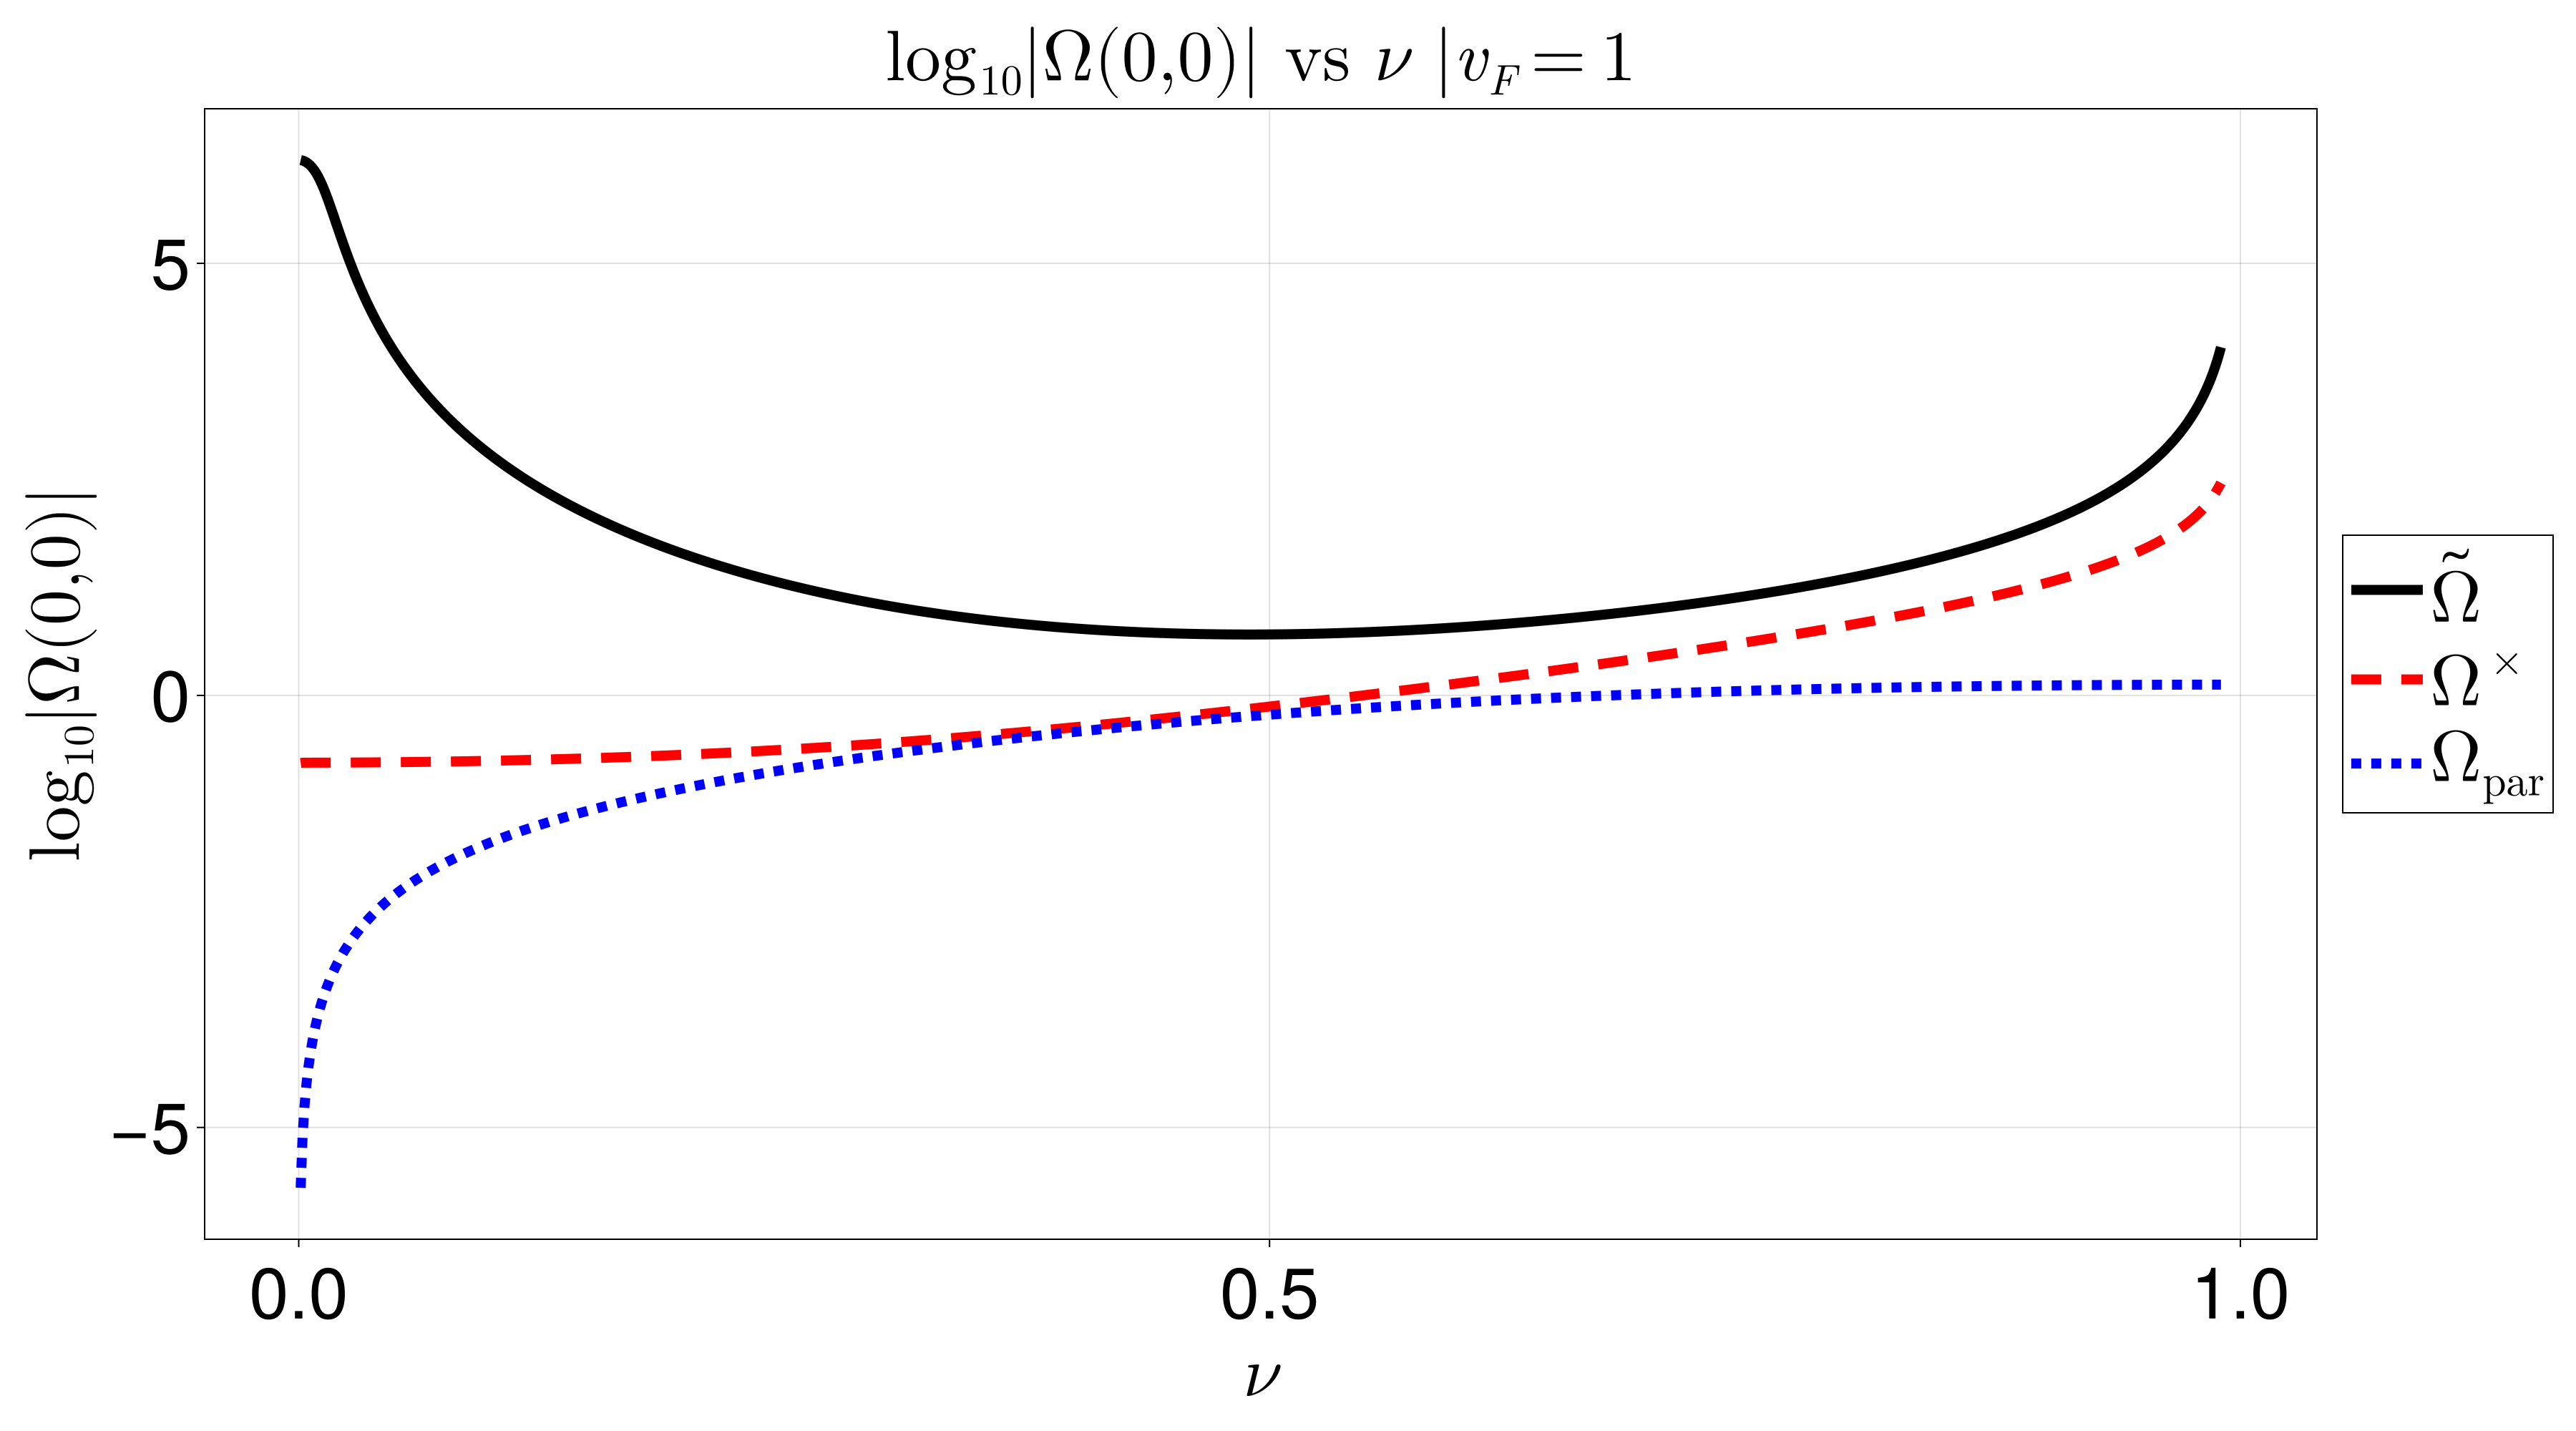

In [92]:
plot_uniform_scaling(1, 1, [0, 0])

# Linear potential scalings

In [97]:
function rmg_parent_term_linear(nu, kappa, vF, q)
    kappa1 = kappa * [cos(0), sin(0)]
    kappa3 = kappa * [cos(2*pi/3), sin(2*pi/3)]
    kappa5 = kappa * [cos(4*pi/3), sin(4*pi/3)]
    delta = -rmg_delta_linear(kappa, nu, 3)
    alpha = -rmg_alpha_linear(kappa, nu, 3)

    bc1 = rmg_bc(nu, kappa1 .+ q)
    bc3 = rmg_bc(nu, kappa3 .+ q)
    bc5 = rmg_bc(nu, kappa5 .+ q)

    ham = H_mft_v2(q, delta, alpha) + H_k_v2(q, vF)

    vec = normalize(gauge_fix(eigvecs(Hermitian(ham))[:, 1]))

    return (abs2(vec[1]) * bc1 + abs2(vec[2]) * bc3 + abs2(vec[3]) * bc5)
end

rmg_parent_term_linear (generic function with 1 method)

In [98]:
function pure_3_patch_linear(nu, kappa, vF, q)
    delta = -rmg_delta_linear(kappa, nu, 3)
    alpha = -rmg_alpha_linear(kappa, nu, 3)
    return bc_no_spinors(reshape(q, (1, 2)), 10^(-3), vF, delta, alpha)[1]
end

pure_3_patch_linear (generic function with 1 method)

In [99]:
function cross_term_linear(nu, kappa, vF, q)
    kappa1 = [kappa, 0]
    kappa3 = kappa * [cos(2*pi/3), sin(2*pi/3)]
    kappa5 = kappa * [cos(4*pi/3), sin(4*pi/3)]

    delta = -rmg_delta_linear(kappa, nu, 3)
    alpha = -rmg_alpha_linear(kappa, nu, 3)

    phi = wrap_angle(angle(delta))

    if 0 < phi && phi < 2*pi/3
        index = 1 + 1
    elseif 2*pi/3 < phi || phi < -2*pi/3
        index = 0 + 1
    elseif phi > -2*pi/3 && phi < 0
        index = 2 + 1
    end

    dmu = 10^(-7)

    ham = H_mft_v2(q, delta, alpha) + H_k_v2(q, vF)

    vec = normalize(gauge_fix(eigvecs(Hermitian(ham))[:, 1]))

    A1 = vec[1]
    grad_A1 = d_A1(delta, alpha/2, q, index, vF/2, dmu)

    A1_x = 2im * real(conj(A1) * grad_A1[1])
    A1_y = 2im * real(conj(A1) * grad_A1[2])

    A3 = vec[2]
    grad_A3 = d_A3(delta, alpha/2, q, index, vF/2, dmu)
    A3_x = 2im * real(conj(A3) * grad_A3[1])
    A3_y = 2im * real(conj(A3) * grad_A3[2])

    A5 = vec[3]
    grad_A5 = d_A5(delta, alpha/2, q, index, vF/2, dmu)
    A5_x = 2im * real(conj(A5) * grad_A5[1])
    A5_y = 2im * real(conj(A5) * grad_A5[2])

    chi1 = rmg_spinor(3, nu, kappa1 .+ q)
    grad_chi1 = d_rmg_spinor(nu, kappa1 .+ q, dmu)
    chi1_x = dot(chi1, grad_chi1[1])
    chi1_y = dot(chi1, grad_chi1[2])

    chi3 = rmg_spinor(3, nu, kappa3 .+ q)
    grad_chi3 = d_rmg_spinor(nu, kappa3 .+ q, dmu)
    chi3_x = dot(chi3, grad_chi3[1])
    chi3_y = dot(chi3, grad_chi3[2])

    chi5 = rmg_spinor(3, nu, kappa5 .+ q)
    grad_chi5 = d_rmg_spinor(nu, kappa5 .+ q, dmu)
    chi5_x = dot(chi5, grad_chi5[1])
    chi5_y = dot(chi5, grad_chi5[2])

    return real((A1_x * chi1_y - A1_y * chi1_x) + (A3_x * chi3_y - A3_y * chi3_x) + (A5_x * chi5_y - A5_y * chi5_x))
end


cross_term_linear (generic function with 1 method)

In [100]:
function plot_linear_scaling(kappa, vF, q)
    nu_list = range(10^(-3), 0.99, 10^3)

    curvatures = Array{Float64}(undef, 3, length(nu_list))

    for j in 1:length(nu_list)
        nu = nu_list[j]
        curvatures[1, j] = log10(abs(rmg_parent_term_linear(nu, kappa, vF, q)))
        curvatures[2, j] = log10(abs(cross_term_linear(nu, kappa, vF, q)))
        curvatures[3, j] = log10(abs(pure_3_patch_linear(nu, kappa, vF, q)))
    end

    fig = Figure(size=(1800, 1000), fontsize=50, fonts = (; regular = "italic", weird = "bold"))
    ax1 = Axis(fig[1, 1], title = L"\text{log_{10}} \left|\Omega(0, 0) \right| \text{ vs } \nu \ | v_F = 1", 
    ylabel = L"\text{log_{10}} \left|\Omega(0, 0) \right|", xlabel = L"\nu")

    lines!(ax1, nu_list, curvatures[1, :], label = L"\Omega_\text{par}", color = :blue; linestyle = (:dot, :dense), linewidth = 7)
    lines!(ax1, nu_list, curvatures[2, :], label = L"\Omega^\times", color = :red; linestyle = (:dash, :dense), linewidth = 7)
    lines!(ax1, nu_list, curvatures[3, :], label = L"\tilde{\Omega}", color = :black; linestyle = (:solid, :dense), linewidth = 7)

    fig[1, 2] = Legend(fig, ax1, patchsize = (50, 10), framevisible = true)
    fig
end

plot_linear_scaling (generic function with 1 method)

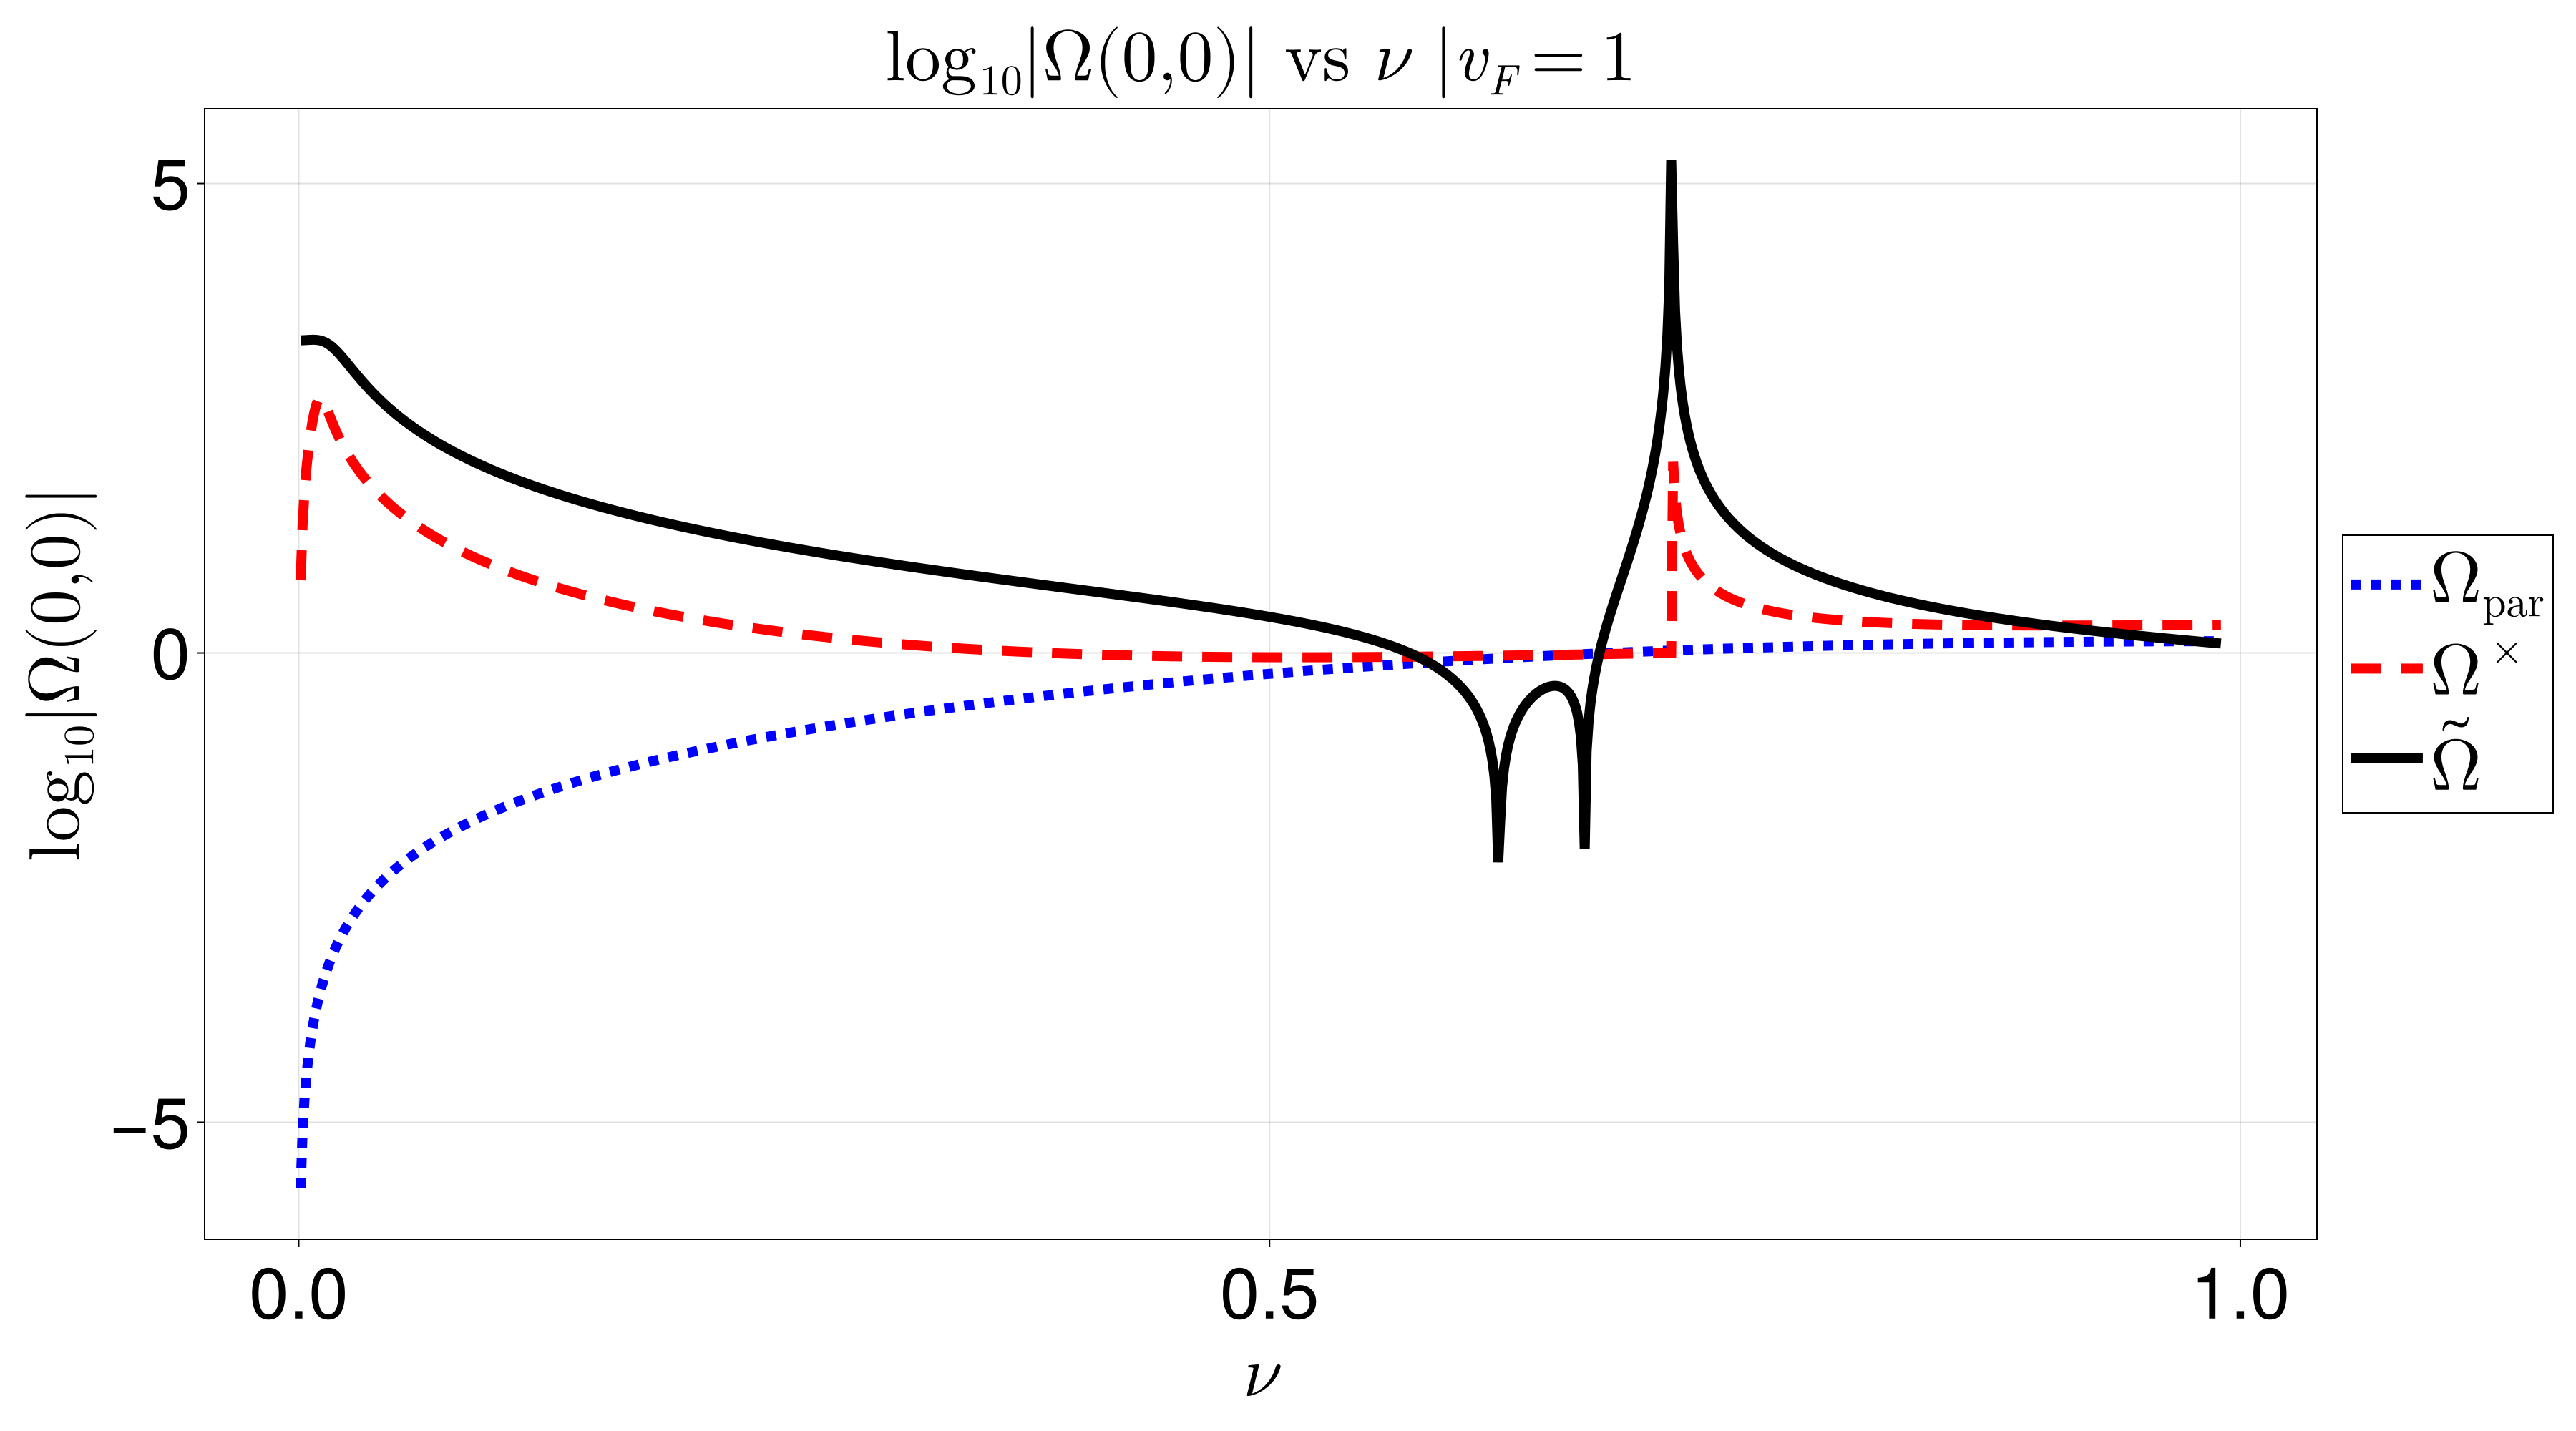

In [101]:
plot_linear_scaling(1, 1, [0, 0])

# Irrelevance of cross term

In [51]:
function plot_uniform_mBZ_scaling(kappa, vF, nu)
    q_list = range(0.0, kappa/2, 10^4)

    curvatures = Array{Float64}(undef, 4, length(q_list))

    for j in 1:length(q_list)
        qmag = q_list[j]
        q = qmag * [cos(2*pi/9), sin(2*pi/9)]
        curvatures[1, j] = log10(abs(rmg_parent_term_uniform(nu, kappa, vF, q)))
        curvatures[2, j] = log10(abs(cross_term_uniform(nu, kappa, vF, q)))
        curvatures[3, j] = log10(abs(pure_3_patch_uniform(nu, kappa, vF, q)))
    end

    fig = Figure(size=(1800, 1000), fontsize=50, fonts = (; regular = "italic", weird = "bold"))
    ax1 = Axis(fig[1, 1], 
    title = L"\text{log_{10}} \left|\Omega \right| \text{ vs } \frac{|q|}{\kappa} \ | v_F = 10, \ \nu = 0.1, \ V^\ell = |V|", 
    ylabel = L"\text{log_{10}} \left|\Omega \right|", xlabel = L"\frac{|q|}{\kappa}")

    lines!(ax1, q_list, curvatures[1, :], label = L"\Omega_\text{par}", color = :blue; linestyle = (:dot, :dense), linewidth = 7)
    lines!(ax1, q_list, curvatures[2, :], label = L"\Omega^\times", color = :red; linestyle = (:dash, :dense), linewidth = 7)
    lines!(ax1, q_list, curvatures[3, :], label = L"\tilde{\Omega}", color = :black; linestyle = (:solid, :dense), linewidth = 7)
    fig[1, 2] = Legend(fig, ax1, patchsize = (50, 10), framevisible = true)
    fig
end

plot_uniform_mBZ_scaling (generic function with 1 method)

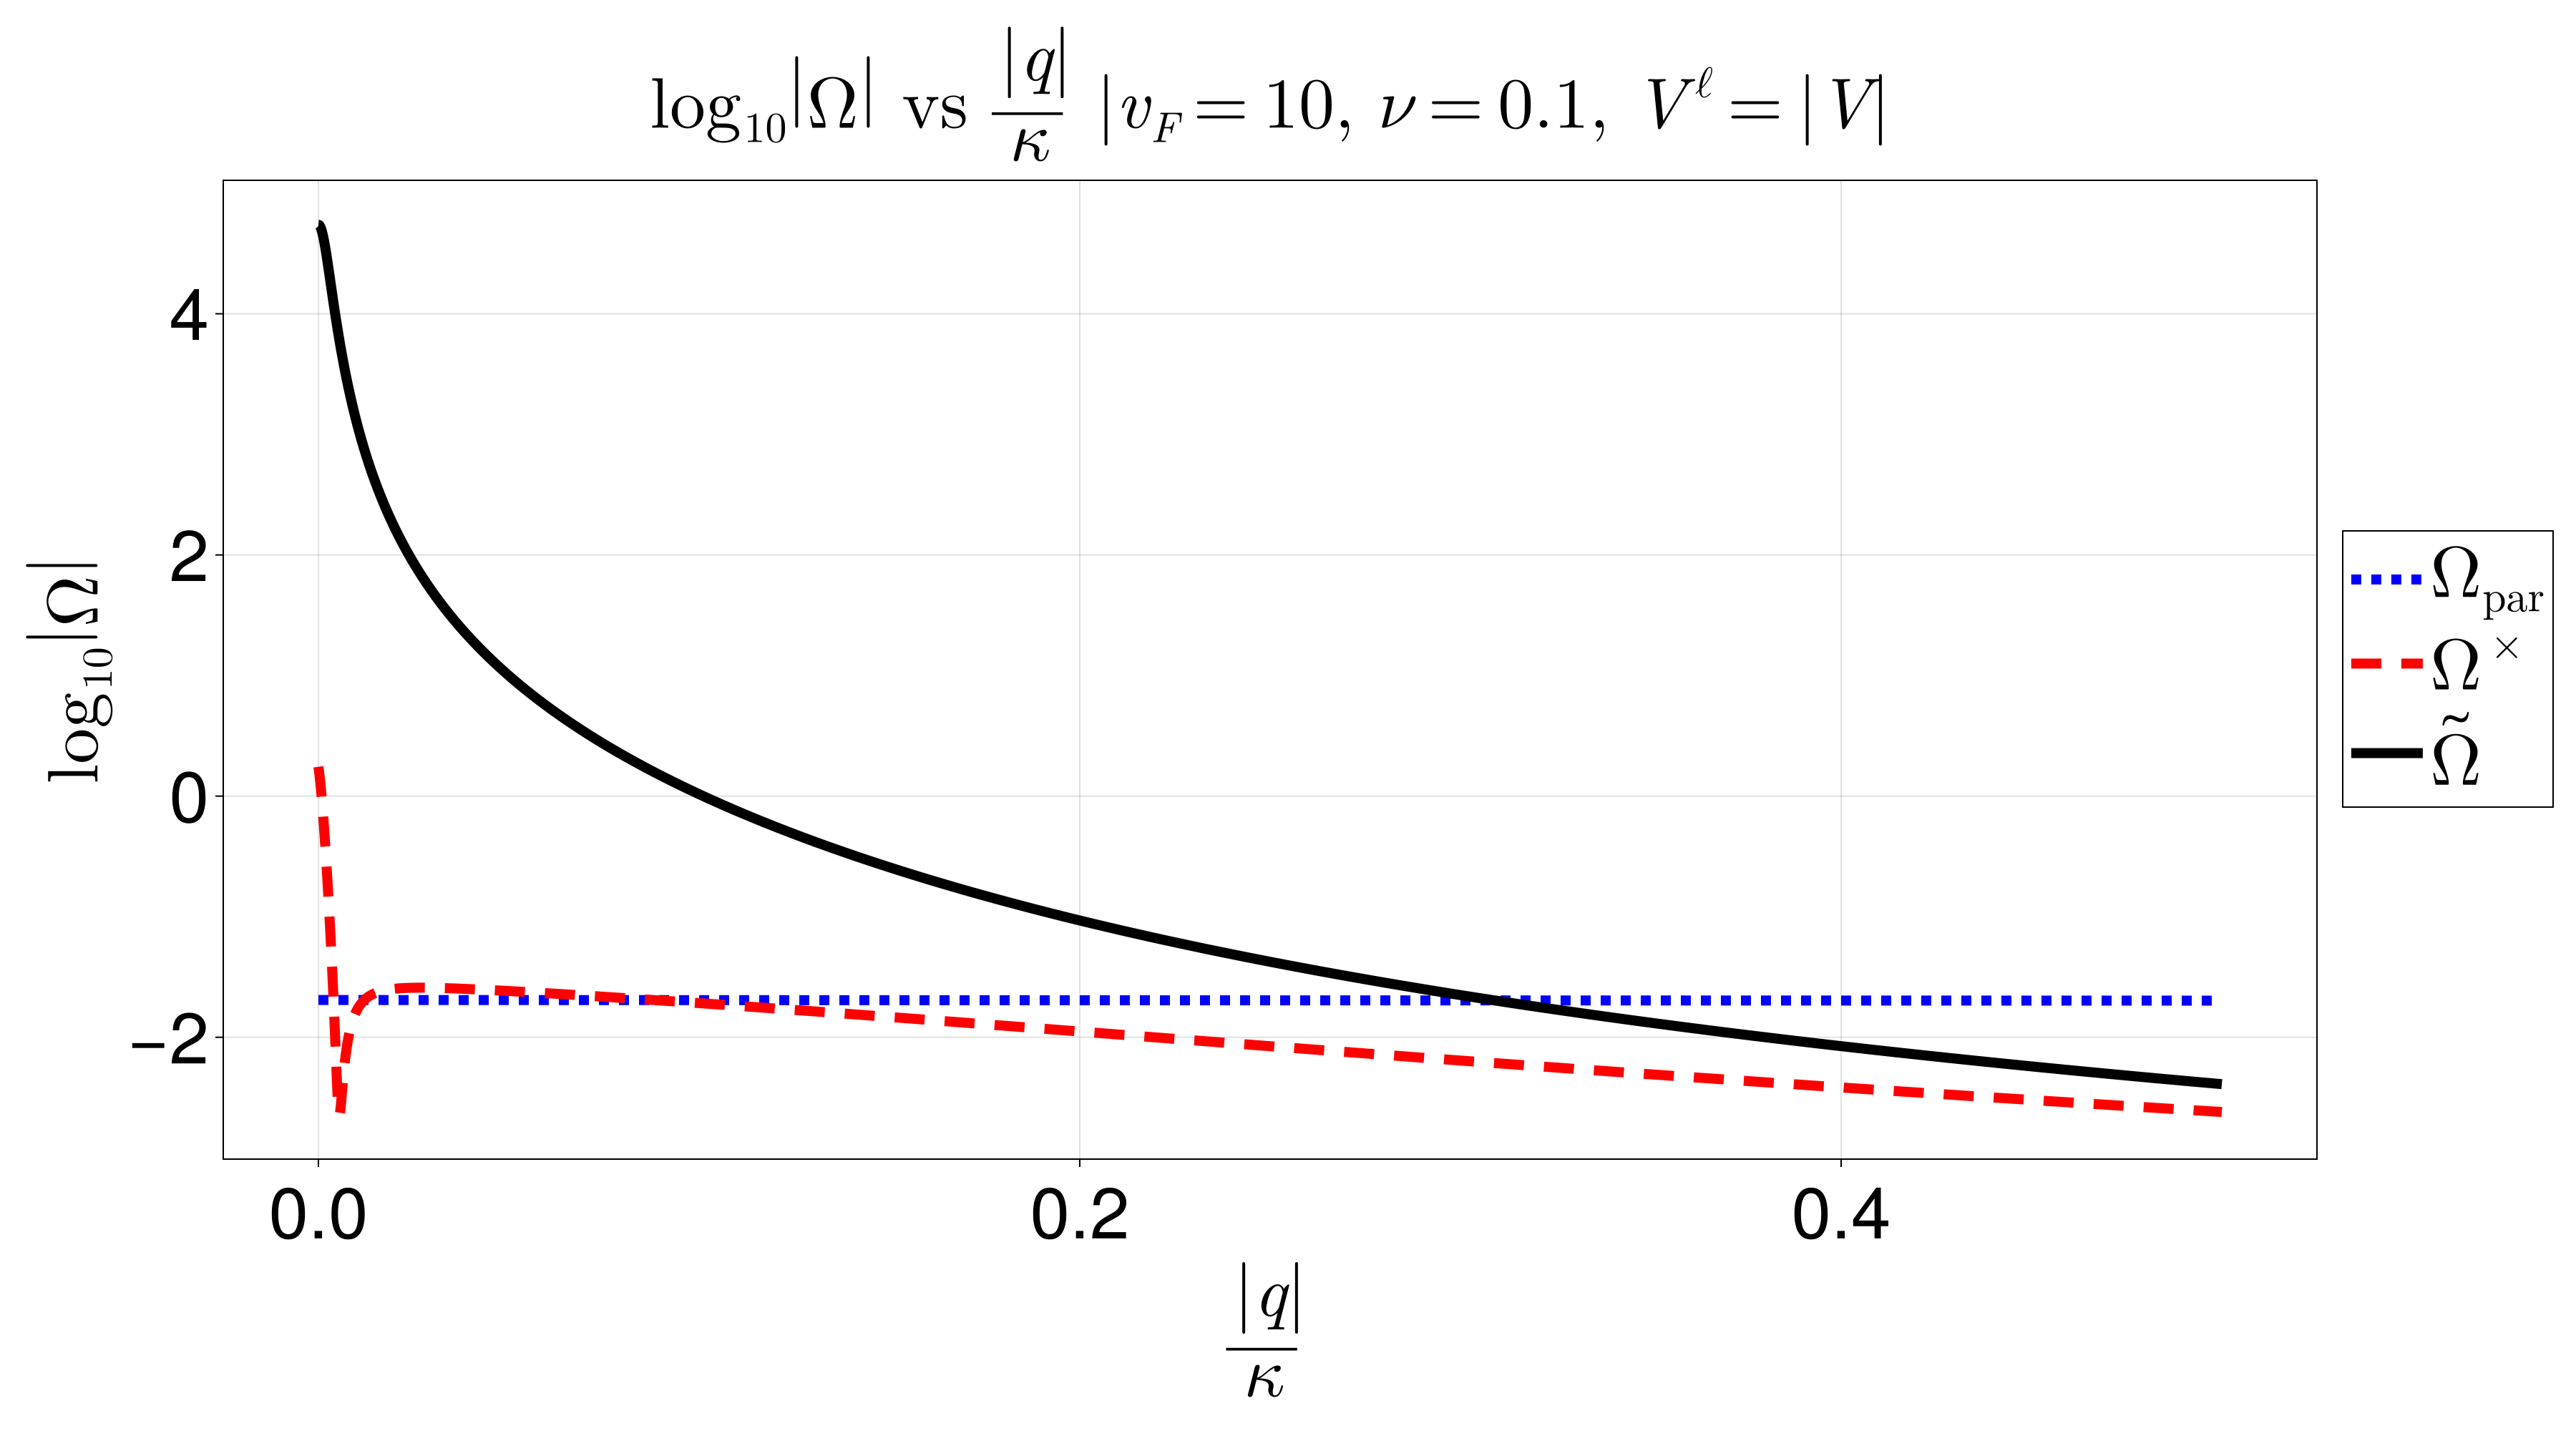

In [52]:
kappa = 1
vF = 10
nu = 0.1
plot_uniform_mBZ_scaling(kappa, vF, nu)

In [93]:
function plot_uniform_mBZ_scaling_prod(kappa, nu)
    q_list = range(0.0, 5, 10^4)

    curvatures = Array{Float64}(undef, 4, length(q_list))

    vF = 1

    for j in 1:length(q_list)
        qmag = q_list[j]
        q = qmag * [cos(2*pi/9), sin(2*pi/9)]
        curvatures[1, j] = log10(abs(rmg_parent_term_uniform(nu, kappa, vF, q)))
        curvatures[2, j] = log10(abs(cross_term_uniform(nu, kappa, vF, q)))
        curvatures[3, j] = log10(abs(pure_3_patch_uniform(nu, kappa, vF, q)))
    end

    fig = Figure(size=(1800, 1000), fontsize=50, fonts = (; regular = "italic", weird = "bold"))
    ax1 = Axis(fig[1, 1], 
    title = L"\text{log_{10}} \left|\Omega \right| \text{ vs } v_F |q| \text{ for } \nu = 0.1, \ V^\ell = -|V|", 
    ylabel = L"\text{log_{10}} \left|\Omega \right|", xlabel = L"v_F |q|")

    lines!(ax1, q_list, curvatures[1, :], label = L"\Omega_\text{par}", color = :blue; linestyle = (:dot, :dense), linewidth = 7)
    lines!(ax1, q_list, curvatures[2, :], label = L"\Omega^\times", color = :red; linestyle = (:dash, :dense), linewidth = 7)
    lines!(ax1, q_list, curvatures[3, :], label = L"\tilde{\Omega}", color = :black; linestyle = (:solid, :dense), linewidth = 7)
    fig[1, 2] = Legend(fig, ax1, patchsize = (50, 10), framevisible = true)
    fig
end

plot_uniform_mBZ_scaling_prod (generic function with 1 method)

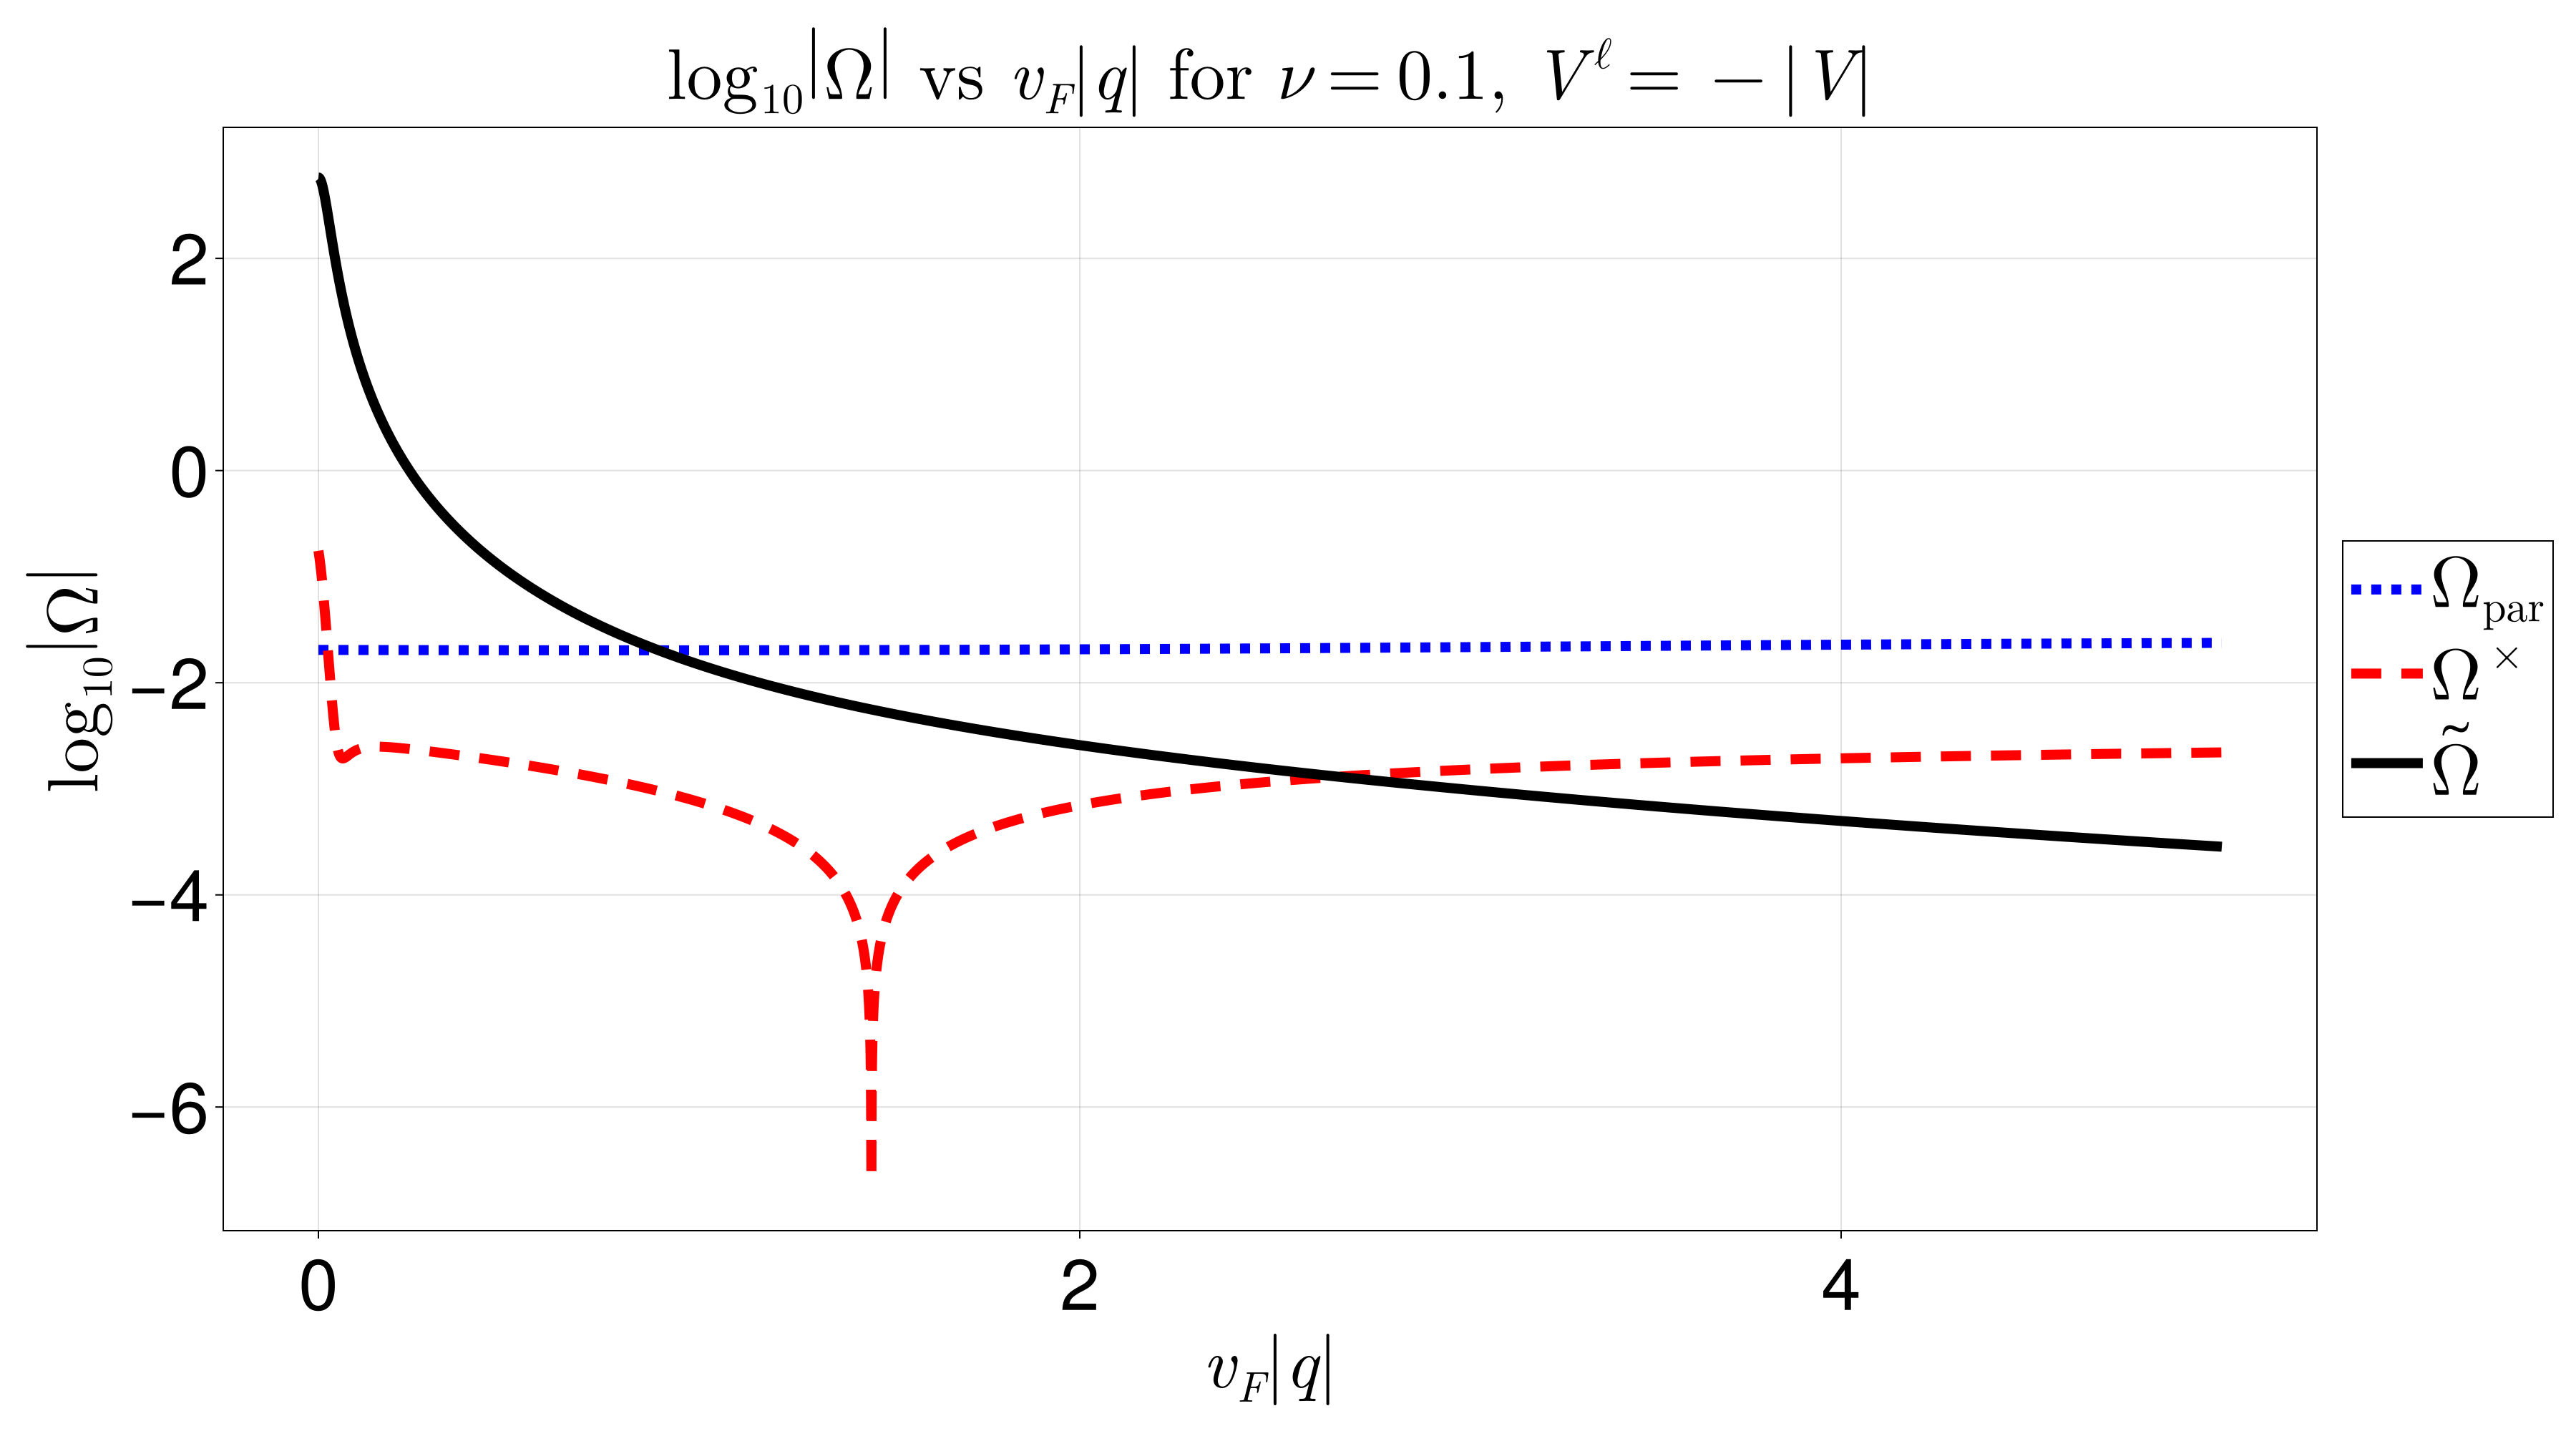

In [94]:
kappa = 1
nu = 0.1
plot_uniform_mBZ_scaling_prod(kappa, nu)

In [59]:
function plot_linear_mBZ_scaling(kappa, vF, nu)
    q_list = range(0.0, kappa/2, 10^4)

    curvatures = Array{Float64}(undef, 4, length(q_list))

    for j in 1:length(q_list)
        qmag = q_list[j]
        q = qmag * [cos(2*pi/9), sin(2*pi/9)]
        curvatures[1, j] = log10(abs(rmg_parent_term_linear(nu, kappa, vF, q)))
        curvatures[2, j] = log10(abs(cross_term_linear(nu, kappa, vF, q)))
        curvatures[3, j] = log10(abs(pure_3_patch_linear(nu, kappa, vF, q)))
    end

    fig = Figure(size=(1800, 1000), fontsize=50, fonts = (; regular = "italic", weird = "bold"))
    ax1 = Axis(fig[1, 1], 
    title = L"\text{log_{10}} \left|\Omega \right| \text{ vs } \frac{|q|}{\kappa} \ | v_F = 10, \ \nu = 0.1, \ V^\ell = |V| \ell", 
    ylabel = L"\text{log_{10}} \left|\Omega \right|", xlabel = L"\frac{|q|}{\kappa}")

    lines!(ax1, q_list, curvatures[1, :], label = L"\Omega_\text{par}", color = :blue; linestyle = (:dot, :dense), linewidth = 7)
    lines!(ax1, q_list, curvatures[2, :], label = L"\Omega^\times", color = :red; linestyle = (:dash, :dense), linewidth = 7)
    lines!(ax1, q_list, curvatures[3, :], label = L"\tilde{\Omega}", color = :black; linestyle = (:solid, :dense), linewidth = 7)

    fig[1, 2] = Legend(fig, ax1, patchsize = (50, 10), framevisible = true)
    fig
end

plot_linear_mBZ_scaling (generic function with 1 method)

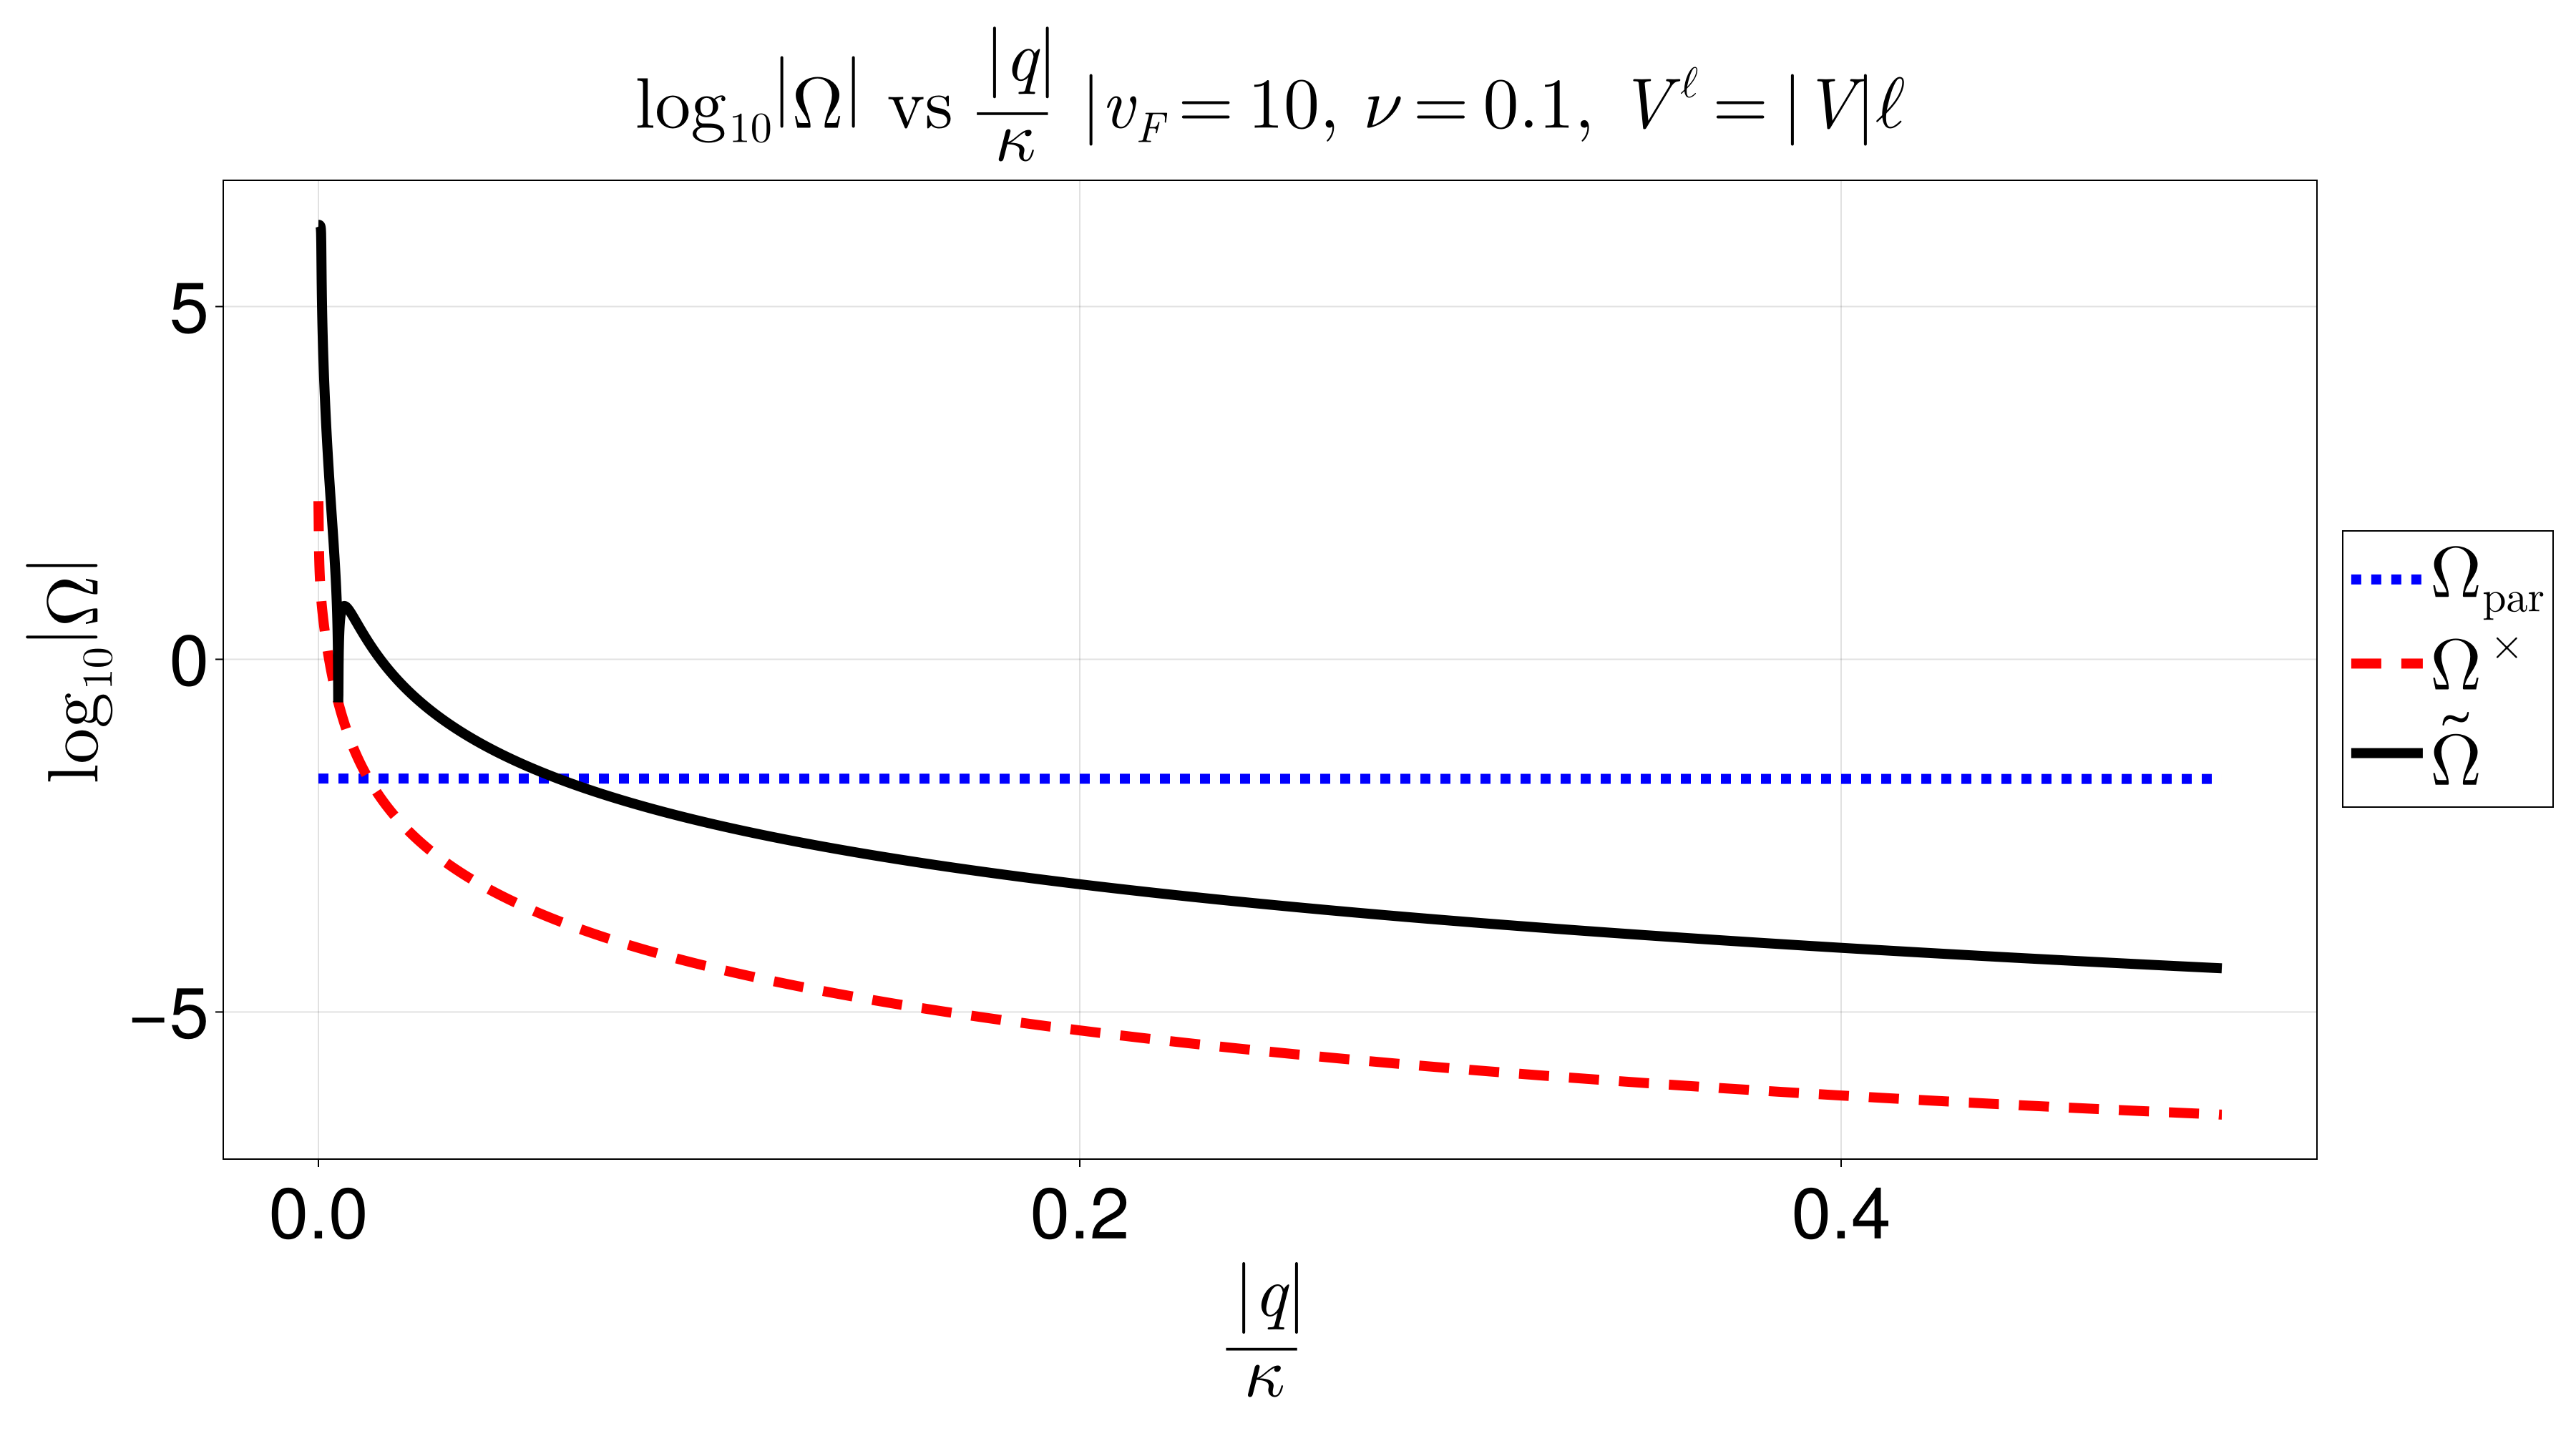

In [60]:
kappa = 1
vF = 10
nu = 0.1
plot_linear_mBZ_scaling(kappa, vF, nu)

In [102]:
function plot_linear_mBZ_scaling_prod(kappa, nu)
    q_list = range(0.0, 5, 10^4)

    curvatures = Array{Float64}(undef, 4, length(q_list))

    vF = 1

    for j in 1:length(q_list)
        qmag = q_list[j]
        q = qmag * [cos(2*pi/9), sin(2*pi/9)]
        curvatures[1, j] = log10(abs(rmg_parent_term_linear(nu, kappa, vF, q)))
        curvatures[2, j] = log10(abs(cross_term_linear(nu, kappa, vF, q)))
        curvatures[3, j] = log10(abs(pure_3_patch_linear(nu, kappa, vF, q)))
    end

    fig = Figure(size=(1800, 1000), fontsize=50, fonts = (; regular = "italic", weird = "bold"))
    ax1 = Axis(fig[1, 1], 
    title = L"\text{log_{10}} \left|\Omega \right| \text{ vs } v_F |q| \text{ for } \nu = 0.1, \ V^\ell = -|V| \ell", 
    ylabel = L"\text{log_{10}} \left|\Omega \right|", xlabel = L"v_F |q|")

    lines!(ax1, q_list, curvatures[1, :], label = L"\Omega_\text{par}", color = :blue; linestyle = (:dot, :dense), linewidth = 7)
    lines!(ax1, q_list, curvatures[2, :], label = L"\Omega^\times", color = :red; linestyle = (:dash, :dense), linewidth = 7)
    lines!(ax1, q_list, curvatures[3, :], label = L"\tilde{\Omega}", color = :black; linestyle = (:solid, :dense), linewidth = 7)
    fig[1, 2] = Legend(fig, ax1, patchsize = (50, 10), framevisible = true)
    fig
end

plot_linear_mBZ_scaling_prod (generic function with 1 method)

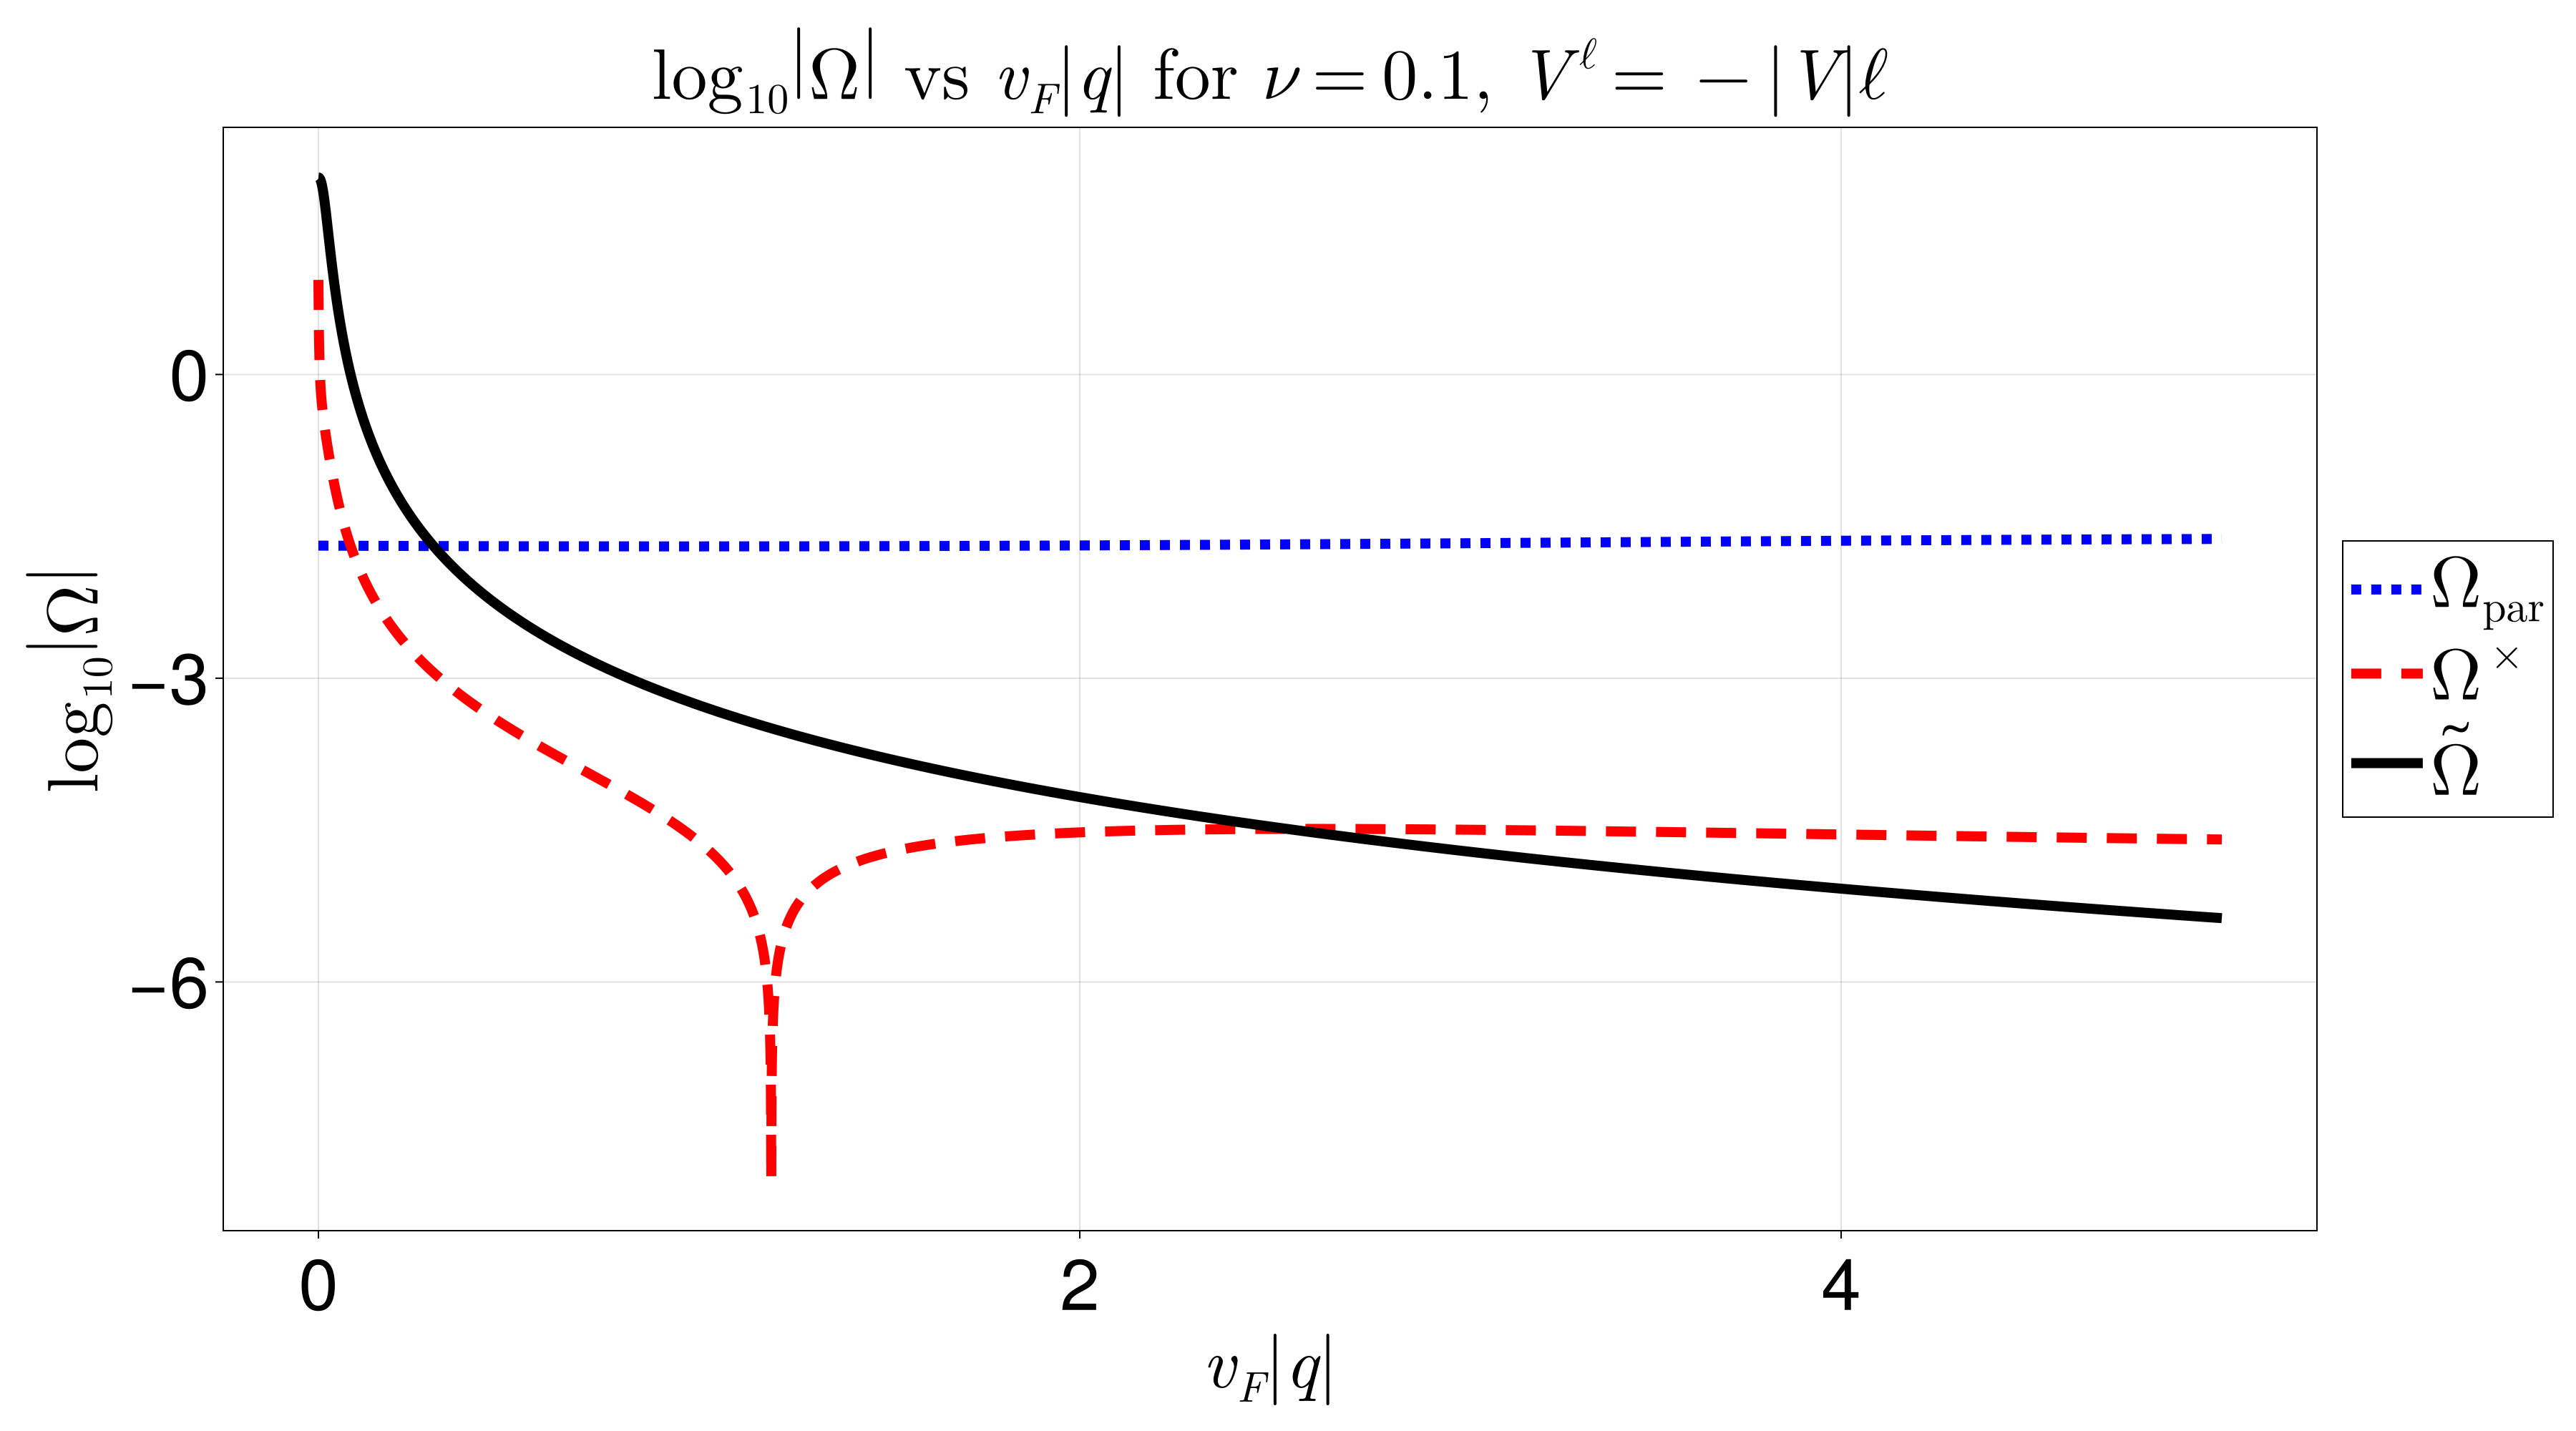

In [103]:
kappa = 1
nu = 0.1
plot_linear_mBZ_scaling_prod(kappa, nu)